In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import seed 
sns.set_style('whitegrid')
seed(42)

In [2]:
data=pd.read_csv('Asteroid_Updated.csv')

C:\Users\apratim sadhu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.shape

(839714, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

In [5]:
df = pd.read_csv('Asteroid_Updated.csv',nrows = 35000)

C:\Users\apratim sadhu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (15,16,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [7]:
for column in df.columns:
    print(column, df[column].isna().sum()/df.shape[0]) #returns the fraction of NAN values

name 0.4916285714285714
a 0.0
e 0.0
i 0.0
om 0.0
w 0.0
q 0.0
ad 0.0
per_y 0.0
data_arc 0.0
condition_code 0.0
n_obs_used 0.0
H 0.0
neo 0.0
pha 0.0
diameter 0.25962857142857143
extent 0.9995714285714286
albedo 0.2601428571428571
rot_per 0.7486571428571429
GM 0.9996571428571429
BV 0.9709142857142857
UB 0.9721142857142857
IR 1.0
spec_B 0.9583714285714285
spec_T 0.9721142857142857
G 0.9967142857142857
moid 0.0
class 0.0
n 0.0
per 0.0
ma 0.0


In [8]:
#Steps 0
df['diameter']=pd.to_numeric(df['diameter'],errors='coerce') #transforming to numeric, setting errors to NaN
dropindexes = df['diameter'][df['diameter'].isnull()].index #rows with nan diameters to drop
dropped_df = df.loc[dropindexes] #saving dropped rows for the future
df = df.drop(dropindexes, axis=0) 

In [9]:
#Steps 1
tooMuchNa = df.columns[df.isna().sum()/df.shape[0] > 0.75]
df = df.drop(tooMuchNa,axis=1)
df = df.drop(['condition_code','name'],axis=1)
# df = df.drop(['neo','pha'],axis=1)

In [10]:
#Step 2
df = df.fillna(df.mean())

In [11]:
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,neo,pha,diameter,albedo,rot_per,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822,1002,...,N,N,939.400,0.0900,9.074170,1.59478,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318,8490,...,N,N,545.000,0.1010,7.813200,1.23324,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684,7104,...,N,N,246.596,0.2140,7.210000,1.03454,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288,9325,...,N,N,525.400,0.4228,5.342128,1.13948,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507,2916,...,N,N,106.699,0.2740,16.806000,1.09589,MBA,0.238632,1508.600458,282.366289


In [12]:
df.isna().values.any()

False

In [13]:
df.shape

(25912, 21)

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelEnc = LabelEncoder()
df['neo'] = labelEnc.fit_transform(df['neo'])
df['pha'] = labelEnc.fit_transform(df['pha'])
df['class'] = labelEnc.fit_transform(df['class'])

cat_data = pd.get_dummies(df, columns=['neo','pha','class'])
cat_data.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9,class_10
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822,1002,...,0,0,0,0,0,1,0,0,0,0
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318,8490,...,0,0,0,0,0,1,0,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684,7104,...,0,0,0,0,0,1,0,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288,9325,...,0,0,0,0,0,1,0,0,0,0
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507,2916,...,0,0,0,0,0,1,0,0,0,0


In [15]:
df['class'].value_counts()

6     23969
8      1071
9       463
5       187
7        88
1        63
0        52
3         8
4         7
10        2
2         2
Name: class, dtype: int64

In [16]:
y = df['diameter']
x = df.drop(['diameter'],axis = 1)

In [17]:
x = x.iloc[:,:].values
x.shape

(25912, 20)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_std = sc.fit_transform(x)


In [19]:
np.mean(x),np.std(x)

(1031.6819384107189, 4152.187007329159)

In [20]:
np.mean(x_std),np.std(x_std)

(-1.3333644846532444e-16, 1.0)

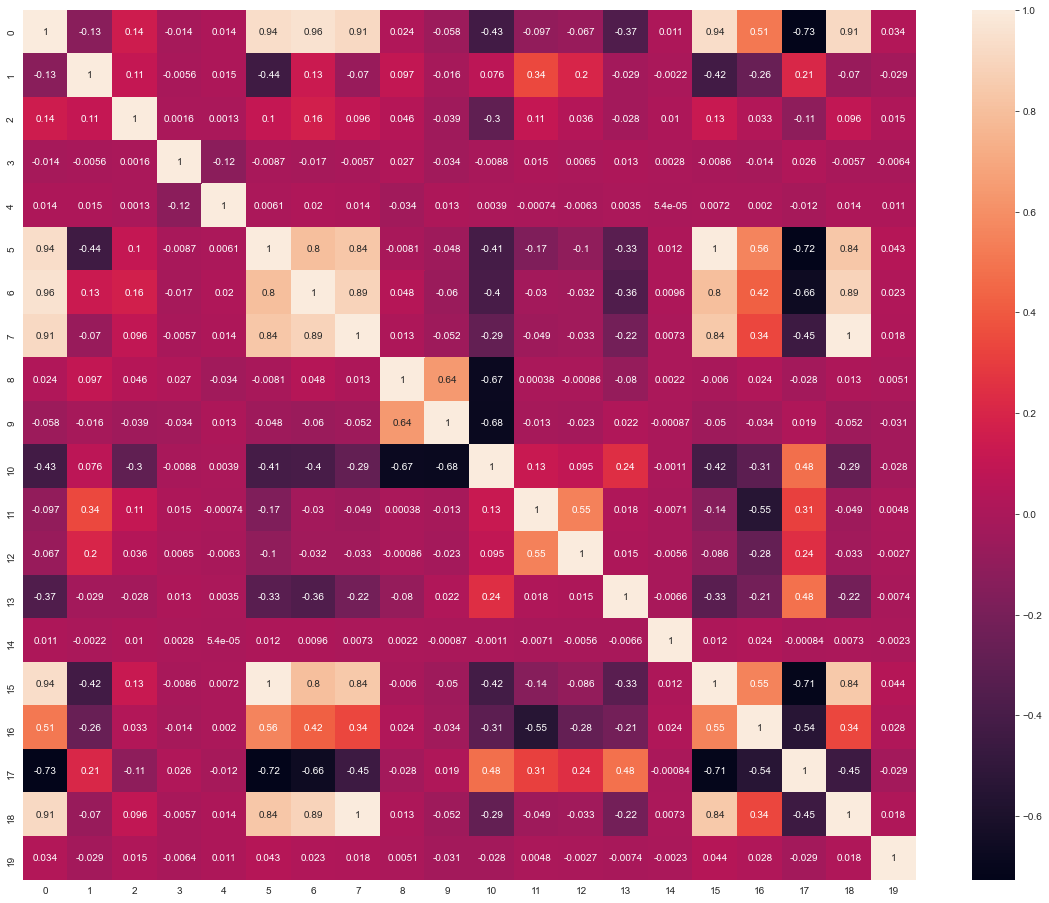

In [21]:
x_std=pd.DataFrame(x_std)
fig = plt.figure(figsize=(20, 16))
sns.heatmap(x_std.corr(), annot=True)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
import math

# SVR

In [158]:
from sklearn import svm
svr=svm.SVR()
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)

print("testing accuracy : ",svr.score(X_test,y_test))
print("training accuracy: ",svr.score(X_train,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error : ', math.sqrt(mean_squared_error(y_test,y_pred)))
print('R^2 Score : ',  r2_score(y_test,y_pred))

testing accuracy :  0.6958138870602542
training accuracy:  0.5453265813506676
Mean Absolute Error: 1.8641733844897908
Mean Squared Error: 91.1631683711018
root mean squared error :  9.547940530350083
R^2 Score :  0.6958138870602542


C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


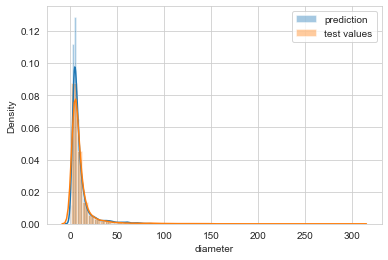

In [159]:
sns.distplot(y_pred,label="prediction")
sns.distplot(y_test,label="test values")
plt.legend()

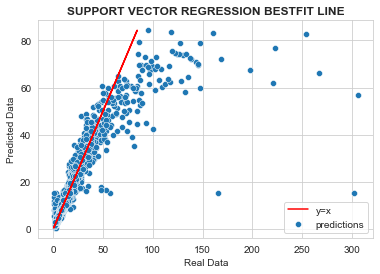

In [160]:
sns.scatterplot(x=y_test,y=y_pred,label='predictions')
plt.plot(y_pred,y_pred,color='red',label='y=x')
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.title('SUPPORT VECTOR REGRESSION BESTFIT LINE',fontweight='bold')
plt.legend()

# DTR

In [161]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y1_pred=dtr.predict(X_test)

print("testing accuracy : ",dtr.score(X_test,y_test))
print("training accuracy: ",dtr.score(X_train,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error : ', math.sqrt(mean_squared_error(y_test,y_pred)))
print('R^2 Score : ',  r2_score(y_test,y_pred))

testing accuracy :  0.9366148242535939
training accuracy:  1.0
Mean Absolute Error: 1.8641733844897908
Mean Squared Error: 91.1631683711018
root mean squared error :  9.547940530350083
R^2 Score :  0.6958138870602542


C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


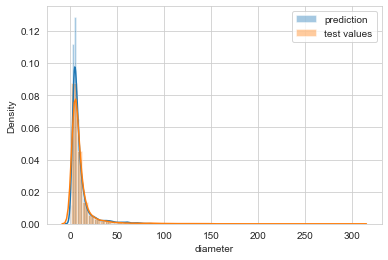

In [162]:
sns.distplot(y_pred,label="prediction")
sns.distplot(y_test,label="test values")
plt.legend()

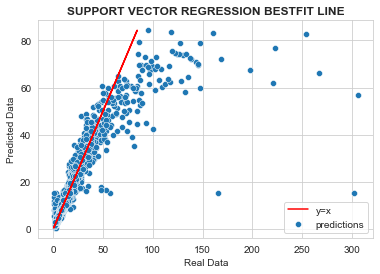

In [163]:
sns.scatterplot(x=y_test,y=y_pred,label='predictions')
plt.plot(y_pred,y_pred,color='red',label='y=x')
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.title('DECISION TREE REGRESSION BESTFIT LINE',fontweight='bold')
plt.legend()

# RFR

In [164]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred= rfr.predict(X_test)

print("testing accuracy : ",rfr.score(X_test,y_test))
print("training accuracy: ",rfr.score(X_train,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score : ',  r2_score(y_test,y_pred))

testing accuracy :  0.9806990202870598
training accuracy:  0.9939420484084464
Mean Absolute Error: 0.8378370036658306
Mean Squared Error: 5.784414174247749
Root Mean Squared Error: 2.405080908046078
R^2 Score :  0.9806990202870598


C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


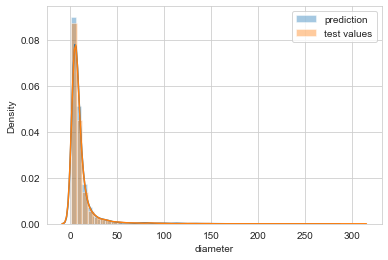

In [165]:
sns.distplot(y_pred,label="prediction")
sns.distplot(y_test,label="test values")
plt.legend()

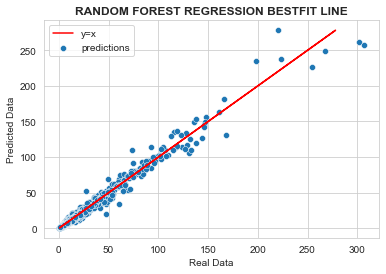

In [166]:
sns.scatterplot(x=y_test,y=y_pred,label='predictions')
plt.plot(y_pred,y_pred,color='red',label='y=x')
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.title('RANDOM FOREST REGRESSION BESTFIT LINE',fontweight='bold')
plt.legend()

# XGBR

In [173]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(X_train,y_train)
y_pred=xgbr.predict(X_test)

print("testing accuracy : ",xgbr.score(X_test,y_test))
print("training accuracy: ",xgbr.score(X_train,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score : ',  r2_score(y_test,y_pred))

testing accuracy :  0.9764581887766592
training accuracy:  0.9985661102498237
Mean Absolute Error: 0.8886862818943174
Mean Squared Error: 7.055371724807252
Root Mean Squared Error: 2.6561949711584147
R^2 Score :  0.9764581887766592


C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


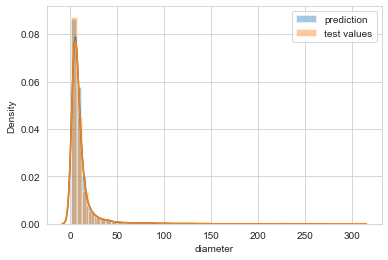

In [171]:
sns.distplot(y_pred,label="prediction")
sns.distplot(y_test,label="test values")
plt.legend()

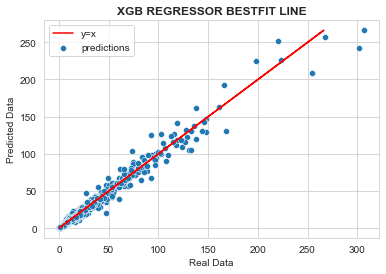

In [172]:
sns.scatterplot(x=y_test,y=y_pred,label='predictions')
plt.plot(y_pred,y_pred,color='red',label='y=x')
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.title('XGB REGRESSOR BESTFIT LINE',fontweight='bold')
plt.legend()

# MLPR

In [40]:
mlpr = MLPRegressor()
mlpr.fit(X_train,y_train)
y_pred= mlpr.predict(X_test)

print("testing accuracy : ",mlpr.score(X_test,y_test))
print("training accuracy: ",mlpr.score(X_train,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score : ',  r2_score(y_pred,y_test))

testing accuracy :  0.9680150304137853
training accuracy:  0.973270113143173
Mean Absolute Error: 1.401197708217158
Mean Squared Error: 9.58574715838601
Root Mean Squared Error: 3.0960857802047426
R^2 Score :  0.9692690683246553


C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


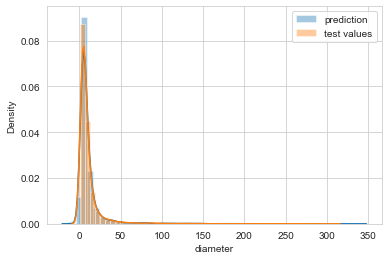

In [41]:
sns.distplot(y_pred,label="prediction")
sns.distplot(y_test,label="test values")
plt.legend()

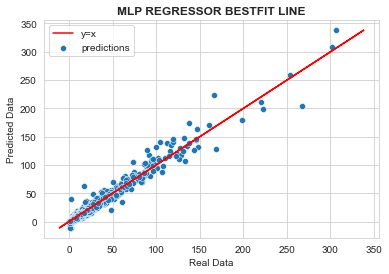

In [42]:
sns.scatterplot(x=y_test,y=y_pred,label='predictions')
plt.plot(y_pred,y_pred,color='red',label='y=x')
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.title('MLP REGRESSOR BESTFIT LINE',fontweight='bold')
plt.legend()

# PCA

Eigenvalues:
[6.71104022e+00 2.29462852e+00 2.08271988e+00 1.14101262e+00
 1.11824939e+00 1.02088273e+00 1.00374205e+00 9.84393684e-01
 9.41170307e-01 8.76596807e-01 6.21344137e-01 4.18395778e-01
 3.32992495e-01 3.05527596e-01 8.38981436e-02 3.54591600e-02
 2.79190524e-02 7.99310479e-04 2.14616692e-30 3.86976070e-31]

Variances (Percentage):
[3.35539061e+01 1.14726998e+01 1.04131975e+01 5.70484291e+00
 5.59103119e+00 5.10421664e+00 5.01851657e+00 4.92177847e+00
 4.70566993e+00 4.38281489e+00 3.10660079e+00 2.09189816e+00
 1.66489822e+00 1.52757902e+00 4.19474529e-01 1.77288958e-01
 1.39589875e-01 3.99639816e-03 1.07304205e-29 1.93480568e-30]



Text(0, 0.5, 'Explained variance (%)')

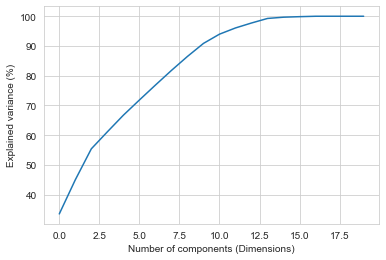

In [28]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(x_std)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [29]:
from sklearn.decomposition import PCA
pca_ast = PCA(n_components=8)
principalComponents_asteroid = pca_ast.fit_transform(x_std)

In [30]:
# principal_ast_df = pd.DataFrame(data = principalComponents_asteroid, columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8'])
principal_ast_df = pd.DataFrame(data = principalComponents_asteroid, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8'])

In [31]:
principal_ast_df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,1.932151,-2.765016,-0.109953,-0.349567,-0.819844,-0.287915,-0.313002,0.319556
1,1.873039,-15.056349,3.301597,-0.493368,1.173791,0.218056,0.850063,2.383879
2,0.846772,-12.855255,2.557104,0.535454,1.577915,1.881691,0.091504,0.855146
3,0.087131,-12.853096,0.723436,2.956756,3.783180,0.849615,0.077569,0.627349
4,0.326516,-6.986873,1.187972,-0.330295,1.631637,-0.486951,-0.106133,0.063694
...,...,...,...,...,...,...,...,...
25907,0.723489,1.756243,0.362282,-1.394034,-0.568666,-0.330034,-0.855816,-1.447494
25908,-0.685030,0.380566,0.144092,0.918001,-1.846293,0.159547,0.258852,0.696212
25909,-0.083061,-1.317604,0.402188,-0.490106,0.287140,0.630994,0.438911,0.838542
25910,0.251157,0.389503,-0.020871,-1.104577,0.051299,-1.531094,-0.054698,-0.045037


In [32]:
print('Explained variation per principal component: {}'.format(pca_ast.explained_variance_ratio_))

Explained variation per principal component: [0.33553906 0.114727   0.10413197 0.05704843 0.05591031 0.05104217
 0.05018517 0.04921778]


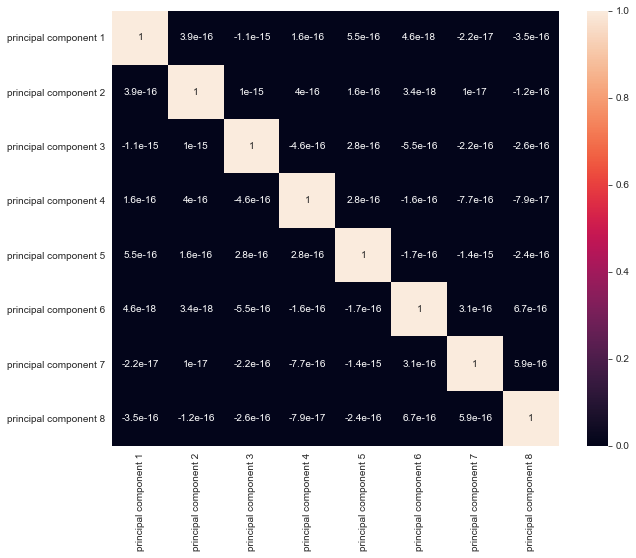

In [33]:
principal_ast_df=pd.DataFrame(principal_ast_df)
fig = plt.figure(figsize=(10,8))
sns.heatmap(principal_ast_df.corr(), annot=True)

In [34]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(principal_ast_df, y, test_size = 0.2, random_state = 0)

# PCA SVR

In [33]:
from sklearn import svm
svr=svm.SVR(C=10,gamma=0.1,kernel='rbf')
svr.fit(X_train_pca,y_train)
y_pred=svr.predict(X_test_pca)

print("testing accuracy : ",svr.score(X_test_pca,y_test))
print("training accuracy: ",svr.score(X_train_pca,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error : ', math.sqrt(mean_squared_error(y_test,y_pred)))
print('R^2 Score : ',  r2_score(y_test,y_pred))

testing accuracy :  0.8074046593117092
training accuracy:  0.6535516514046464
Mean Absolute Error: 1.9076355343996638
Mean Squared Error: 57.71993106777438
root mean squared error :  7.597363428701722
R^2 Score :  0.8074046593117092


C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


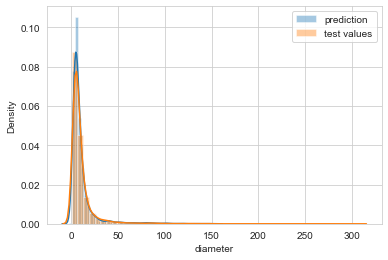

In [34]:
sns.distplot(y_pred,label="prediction")
sns.distplot(y_test,label="test values")
plt.legend()

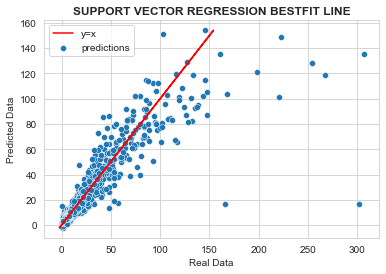

In [35]:
sns.scatterplot(x=y_test,y=y_pred,label='predictions')
plt.plot(y_pred,y_pred,color='red',label='y=x')
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.title('SUPPORT VECTOR REGRESSION BESTFIT LINE',fontweight='bold')
plt.legend()

# PCA DTR

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='mae', max_depth=15, max_features='auto')
dtr.fit(X_train_pca,y_train)
y1_pred=dtr.predict(X_test_pca)

print("testing accuracy : ",dtr.score(X_test_pca,y_test))
print("training accuracy: ",dtr.score(X_train_pca,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error : ', math.sqrt(mean_squared_error(y_test,y_pred)))
print('R^2 Score : ',  r2_score(y_test,y_pred))

C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


testing accuracy :  0.6617236153683307
training accuracy:  0.993107876352371
Mean Absolute Error: 2.0946632792018405
Mean Squared Error: 43.0515395476682
root mean squared error :  6.561367201099798
R^2 Score :  0.8563489981198571


C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


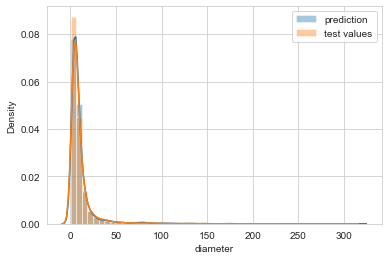

In [52]:
sns.distplot(y_pred,label="prediction")
sns.distplot(y_test,label="test values")
plt.legend()

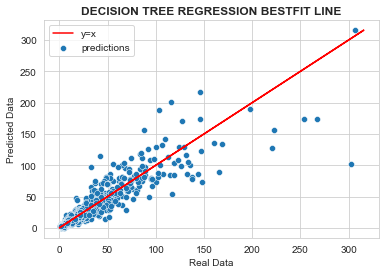

In [53]:
sns.scatterplot(x=y_test,y=y_pred,label='predictions')
plt.plot(y_pred,y_pred,color='red',label='y=x')
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.title('DECISION TREE REGRESSION BESTFIT LINE',fontweight='bold')
plt.legend()

# PCA RFR

In [54]:
rfr = RandomForestRegressor()
# n_estimators=300,max_depth=15,criterion="mae",max_features=3
rfr.fit(X_train_pca,y_train)
y_pred= rfr.predict(X_test_pca)

print("testing accuracy : ",rfr.score(X_test_pca,y_test))
print("training accuracy: ",rfr.score(X_train_pca,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score : ',  r2_score(y_test,y_pred))

testing accuracy :  0.7880561681802499
training accuracy:  0.9611615790995307
Mean Absolute Error: 2.283916428709242
Mean Squared Error: 63.51858419397213
Root Mean Squared Error: 7.969854715989002
R^2 Score :  0.7880561681802499


C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


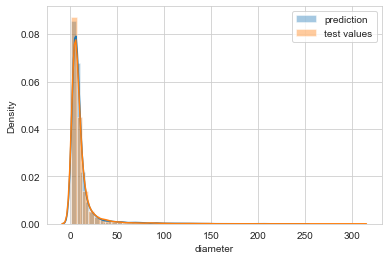

In [55]:
sns.distplot(y_pred,label="prediction")
sns.distplot(y_test,label="test values")
plt.legend()

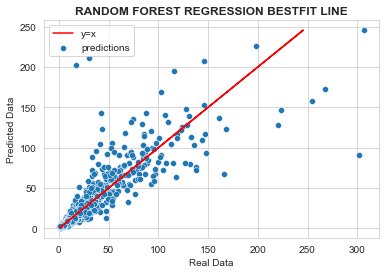

In [56]:
sns.scatterplot(x=y_test,y=y_pred,label='predictions')
plt.plot(y_pred,y_pred,color='red',label='y=x')
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.title('RANDOM FOREST REGRESSION BESTFIT LINE',fontweight='bold')
plt.legend()

# PCA XGBR

In [57]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(n_estimators=3000,max_depth=5,gamma=0.1)
xgbr.fit(X_train_pca,y_train)
y_pred=xgbr.predict(X_test_pca)

print("testing accuracy : ",xgbr.score(X_test_pca,y_test))
print("training accuracy: ",xgbr.score(X_train_pca,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score : ',  r2_score(y_test,y_pred))

testing accuracy :  0.8563489981198571
training accuracy:  0.9996684552454481
Mean Absolute Error: 2.0946632792018405
Mean Squared Error: 43.0515395476682
Root Mean Squared Error: 6.561367201099798
R^2 Score :  0.8563489981198571


C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


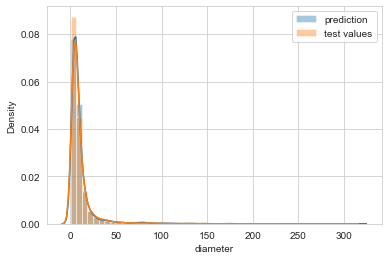

In [58]:
sns.distplot(y_pred,label="prediction")
sns.distplot(y_test,label="test values")
plt.legend()

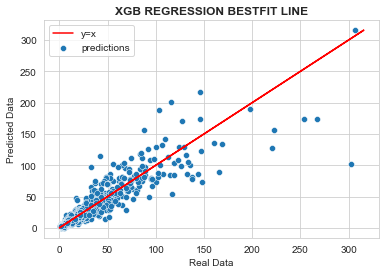

In [59]:
sns.scatterplot(x=y_test,y=y_pred,label='predictions')
plt.plot(y_pred,y_pred,color='red',label='y=x')
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.title('XGB REGRESSION BESTFIT LINE',fontweight='bold')
plt.legend()

# PCA MLPR

In [35]:
mlpr = MLPRegressor()
mlpr.fit(X_train_pca,y_train)
y_pred= mlpr.predict(X_test_pca)

print("testing accuracy : ",mlpr.score(X_test_pca,y_test))
print("training accuracy: ",mlpr.score(X_train_pca,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score : ',  r2_score(y_pred,y_test))

testing accuracy :  0.8771747786994871
training accuracy:  0.8123214913737411
Mean Absolute Error: 2.177855149568226
Mean Squared Error: 36.810149619994206
Root Mean Squared Error: 6.067136855222091
R^2 Score :  0.863918694681117


C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


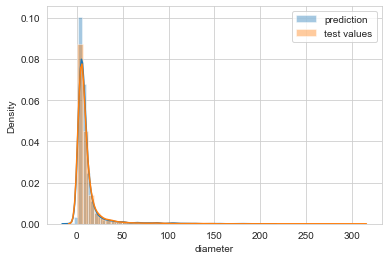

In [38]:
sns.distplot(y_pred,label="prediction")
sns.distplot(y_test,label="test values")
plt.legend()

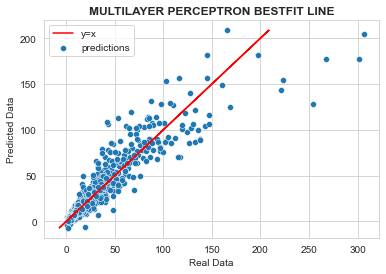

In [39]:
sns.scatterplot(x=y_test,y=y_pred,label='predictions')
plt.plot(y_pred,y_pred,color='red',label='y=x')
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.title('MULTILAYER PERCEPTRON BESTFIT LINE',fontweight='bold')
plt.legend()

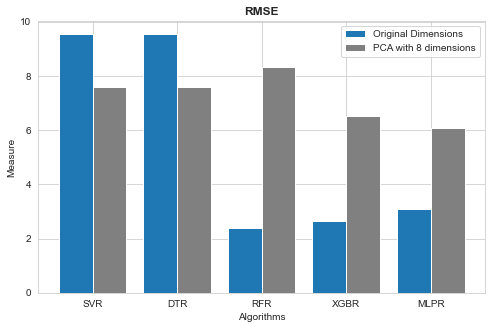

In [43]:
fig = plt.figure(figsize=(8,5))
X = ['SVR','DTR','RFR','XGBR','MLPR']
Y20 = [9.5479,9.5479,2.4050,2.6561,3.0960]
ZPCA8 = [7.5973,7.5973,8.3416,6.5163,6.0671]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y20, 0.4, label = 'Original Dimensions')
plt.bar(X_axis + 0.2, ZPCA8, 0.4, label = 'PCA with 8 dimensions',color='gray')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Measure")
plt.title("RMSE",fontweight='bold')
# plt.ylim(80,100)
plt.legend()
plt.show()

  Algorithm  Original Dimensions  PCA with 8 dimensions
0       SVR               9.5479                 7.5973
1       DTR               9.5479                 7.5973
2       RFR               2.4050                 8.3416
3      XGBR               2.6561                 6.5163
4      MLPR               3.0960                 6.0671


<Figure size 576x360 with 0 Axes>

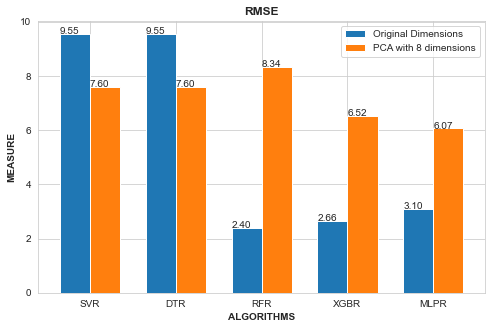

In [44]:
from decimal import Decimal
df1 = pd.DataFrame({
    'Algorithm': ['SVR','DTR','RFR','XGBR','MLPR'],
    'Original Dimensions': [9.5479,9.5479,2.4050,2.6561,3.0960],
    'PCA with 8 dimensions': [7.5973,7.5973,8.3416,6.5163,6.0671]
})

print(df1)
df1.head(10)

fig = plt.figure(figsize=(8,5))
# sns.set_style("darkgrid")
ax=df1.plot(x="Algorithm",y=['Original Dimensions','PCA with 8 dimensions'],kind="bar",width=0.7,figsize=(8,5))
for p in ax.patches:
    ax.annotate('{:.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.xlabel("ALGORITHMS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=0)
# plt.ylim(50,105)
plt.title('RMSE',fontweight='bold')
#plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()

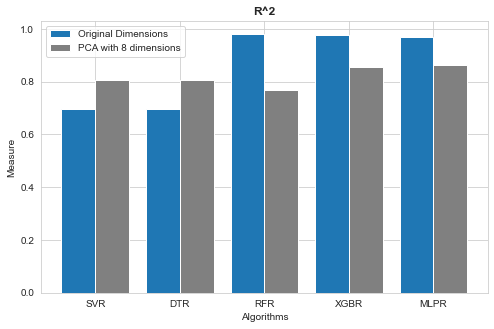

In [47]:
fig = plt.figure(figsize=(8,5))
X = ['SVR','DTR','RFR','XGBR','MLPR']
Y20 = [0.6958,0.6958,0.9806,0.9764,0.9692]
ZPCA8 = [0.8074,0.8074,0.7678,0.8563,0.8639]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y20, 0.4, label = 'Original Dimensions')
plt.bar(X_axis + 0.2, ZPCA8, 0.4, label = 'PCA with 8 dimensions',color='gray')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Measure")
plt.title("R^2",fontweight='bold')
# plt.ylim(80,100)
plt.legend()
plt.show()

  Algorithm  Original Dimensions  PCA with 8 dimensions
0       SVR               0.6958                 0.8074
1       DTR               0.6958                 0.8074
2       RFR               0.9806                 0.7678
3      XGBR               0.9764                 0.8563
4      MLPR               0.9692                 0.8639


<Figure size 576x360 with 0 Axes>

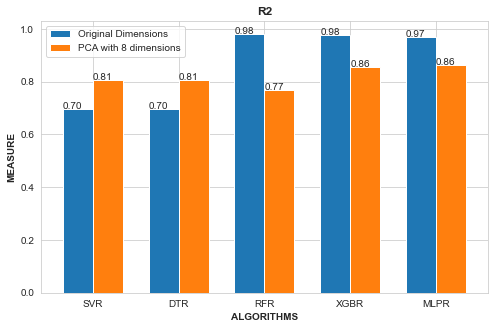

In [46]:
from decimal import Decimal
df1 = pd.DataFrame({
    'Algorithm': ['SVR','DTR','RFR','XGBR','MLPR'],
    'Original Dimensions': [0.6958,0.6958,0.9806,0.9764,0.9692],
    'PCA with 8 dimensions': [0.8074,0.8074,0.7678,0.8563,0.8639]
})

print(df1)
df1.head(10)

fig = plt.figure(figsize=(8,5))
# sns.set_style("darkgrid")
ax=df1.plot(x="Algorithm",y=['Original Dimensions','PCA with 8 dimensions'],kind="bar",width=0.7,figsize=(8,5))
for p in ax.patches:
    ax.annotate('{:.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.xlabel("ALGORITHMS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=0)
# plt.ylim(50,105)
plt.title('R2',fontweight='bold')
#plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()

In [8]:
import keras
from keras import Sequential

In [54]:
model = Sequential([
    keras.layers.Dense(200,activation='relu',input_shape=(20729, 20)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),  
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(1)
])

In [55]:
model.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [56]:
history = model.fit(X_train,y_train,validation_split=0.2, epochs=100)

Epoch 1/100


507/519 [============================>.] - ETA: 0s - loss: 129.1756 - mse: 129.1756

519/519 [==============================] - 1s 2ms/step - loss: 131.8912 - mse: 131.8912 - val_loss: 408.1422 - val_mse: 408.1422
Epoch 2/100
519/519 [==============================] - 1s 2ms/step - loss: 136.4540 - mse: 136.4540 - val_loss: 156.6991 - val_mse: 156.6991
Epoch 3/100
519/519 [==============================] - 1s 2ms/step - loss: 83.1059 - mse: 83.1059 - val_loss: 101.2380 - val_mse: 101.2380
Epoch 4/100
519/519 [==============================] - 1s 2ms/step - loss: 48.1782 - mse: 48.1782 - val_loss: 272.0023 - val_mse: 272.0023
Epoch 5/100
519/519 [==============================] - 1s 2ms/step - loss: 28.5117 - mse: 28.5117 - val_loss: 55.6395 - val_mse: 55.6395
Epoch 6/100
519/519 [==============================] - 1s 2ms/step - loss: 19.2352 - mse: 19.2352 - val_loss: 83.4740 - val_mse: 83.4740
Epoch 7/100
519/519 [==============================] - 1s 2ms/step - loss: 116.2444 - mse: 116.2444 - val_loss: 104.4522 - val_mse: 104.4522
Epoch 8/100
519/519 [================

In [57]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 12.9473 - mse: 12.9473


[12.947257041931152, 12.947257041931152]

In [67]:
train_rmse=np.sqrt(29.0856)
test_rmse=np.sqrt(12.9473)
val_rmse=np.sqrt(34.5160)

print(train_rmse)
print(test_rmse)
print(val_rmse)

5.39310671134922
3.5982356787736958
5.875031914806931


In [70]:
y_pred=model.predict(X_test)

In [71]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score : ',  r2_score(y_test,y_pred))

Root Mean Squared Error: 3.598229358083439
R^2 Score :  0.9567986162171046


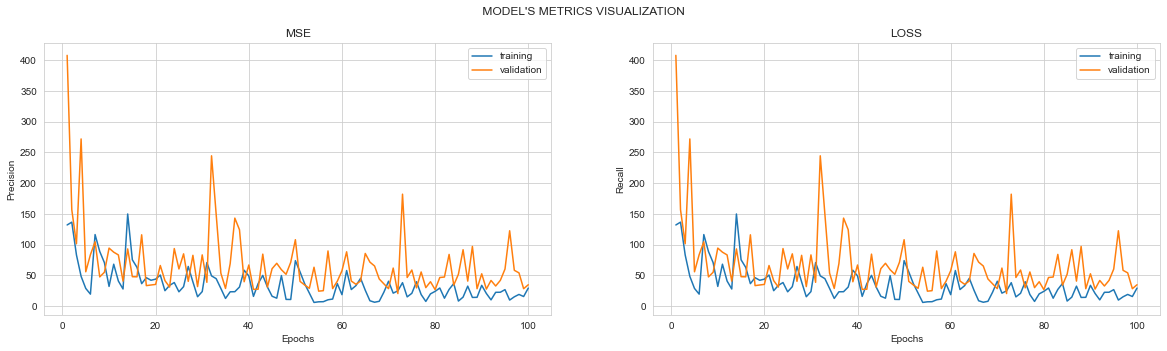

In [69]:
def Train_Val_Plot(mse,val_mse,loss,val_loss):
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

   
    ax1.plot(range(1, len(mse) + 1), mse)
    ax1.plot(range(1, len(val_mse) + 1), val_mse)
    ax1.set_title('MSE')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Precision')
    ax1.legend(['training', 'validation'])
    
    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('LOSS')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Recall')
    ax2.legend(['training', 'validation'])

    plt.show()
    

Train_Val_Plot(history.history['mse'],history.history['val_mse'],
               history.history['loss'],history.history['val_loss'],
              )

# PCA NEURAL NETWORK

In [81]:
model = Sequential([
    keras.layers.Dense(200,activation='relu',input_shape=(20729, 8)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),  
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(1)
])

In [82]:
model.compile(loss='mse',optimizer='adam',metrics=['mse'])
history = model.fit(X_train_pca,y_train,validation_split=0.2, epochs=100)

Epoch 1/100


506/519 [============================>.] - ETA: 0s - loss: 154.2249 - mse: 154.2249

519/519 [==============================] - 1s 3ms/step - loss: 150.9929 - mse: 150.9929 - val_loss: 153.0243 - val_mse: 153.0243
Epoch 2/100
519/519 [==============================] - 1s 2ms/step - loss: 124.6701 - mse: 124.6701 - val_loss: 89.2924 - val_mse: 89.2924
Epoch 3/100
519/519 [==============================] - 1s 2ms/step - loss: 116.1523 - mse: 116.1523 - val_loss: 132.2105 - val_mse: 132.2105
Epoch 4/100
519/519 [==============================] - 1s 2ms/step - loss: 103.3182 - mse: 103.3182 - val_loss: 214.6052 - val_mse: 214.6052
Epoch 5/100
519/519 [==============================] - 1s 2ms/step - loss: 121.3147 - mse: 121.3147 - val_loss: 114.9549 - val_mse: 114.9549
Epoch 6/100
519/519 [==============================] - 1s 2ms/step - loss: 105.2587 - mse: 105.2587 - val_loss: 113.3628 - val_mse: 113.3628
Epoch 7/100
519/519 [==============================] - 1s 2ms/step - loss: 100.1906 - mse: 100.1906 - val_loss: 139.0463 - val_mse: 139.0463
Epoch 8/100
519/519 [======

In [83]:
model.evaluate(X_test_pca,y_test)
y_pred=model.predict(X_test_pca)

162/162 [==============================] - 0s 771us/step - loss: 48.0988 - mse: 48.0988


In [84]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score : ',  r2_score(y_test,y_pred))

Root Mean Squared Error: 6.935329099642069
R^2 Score :  0.8395077294529948


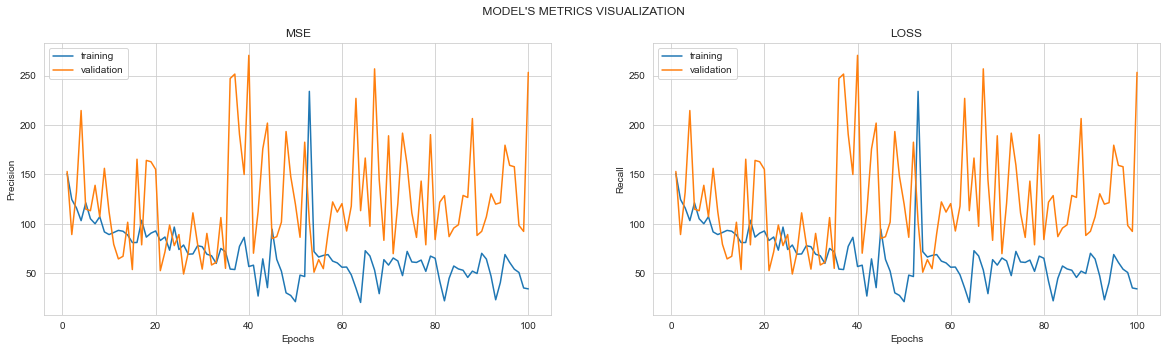

In [85]:
def Train_Val_Plot(mse,val_mse,loss,val_loss):
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

   
    ax1.plot(range(1, len(mse) + 1), mse)
    ax1.plot(range(1, len(val_mse) + 1), val_mse)
    ax1.set_title('MSE')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Precision')
    ax1.legend(['training', 'validation'])
    
    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('LOSS')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Recall')
    ax2.legend(['training', 'validation'])

    plt.show()
    

Train_Val_Plot(history.history['mse'],history.history['val_mse'],
               history.history['loss'],history.history['val_loss'],
              )